# Ejercicio 1: Clasificación binaria con datos más o menos balanceados

https://lukmanaj.medium.com/exploring-breast-cancer-classification-logistic-regression-and-scikit-learn-in-action-1c94a3d9fe49

https://www.kaggle.com/code/devkambhampati/breast-cancer-classification-logistic-regression

### Exploring the Breast Cancer Dataset
To showcase the power of logistic regression, I will utilize the widely-used breast cancer dataset available in Scikit-Learn. This dataset contains features computed from digitized images of fine needle aspirates of breast mass. It aims to classify tumors as malignant or benign based on these features.



In [1]:
# importing required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Load the dataset
data = load_breast_cancer()

# Convert the dataset to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Save the DataFrame to a CSV file
df.to_csv('breast_cancer_dataset.csv', index=False)

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [2]:
# Load the breast cancer dataset
X,y = load_breast_cancer(return_X_y = True)

### Pre-processing the Data

Before training our logistic regression model, it is essential to preprocess the data. This involves handling missing values, scaling numerical features, and encoding categorical variables. Additionally, splitting the dataset into training and testing subsets allows us to evaluate the model’s performance on unseen data. All these are minimal for the breast cancer dataset, as it is ready-made for use in the sklearn library.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation
With the pre-processed dataset in hand, I can proceed to train the logistic regression model. Scikit-Learn provides a convenient interface for fitting the logistic regression algorithm to the data in a very easy-to-use syntax.

To evaluate the trained model, I will employ various evaluation metrics such as accuracy, precision, recall, and F1 score; all these can be seen in the classification report from sklearn.metrics. These metrics provide insights into the model’s ability to correctly classify instances from both classes (benign and malignant).

In [6]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test,y_pred)
print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')

accuracy score: 0.9736842105263158
classifcation report : 
                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



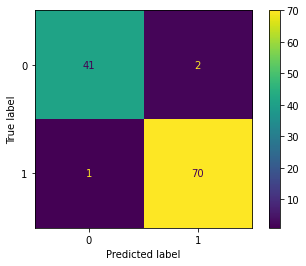

In [7]:
cm  = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=model.classes_)
disp.plot()
plt.show()

Mejores parámetros encontrados: {'C': 0.1}
Exactitud promedio en validación cruzada con mejores parámetros: 0.9789318428815401


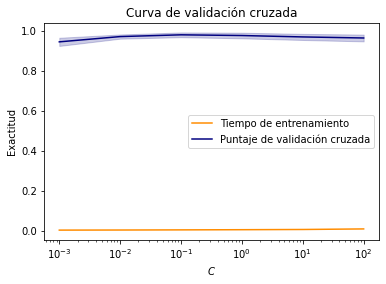

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       212
           1       0.98      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.99      0.99      0.99       569



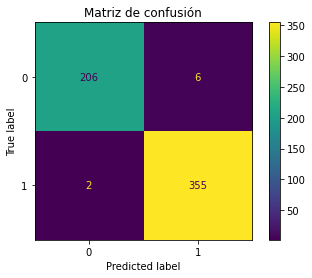

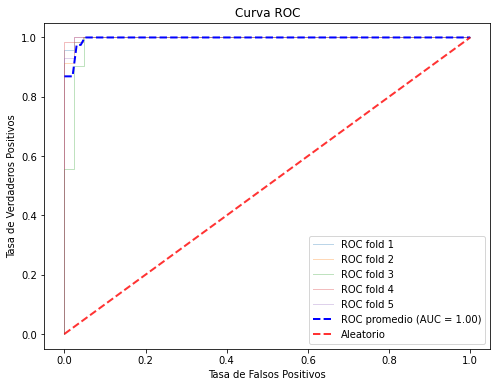

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Cargar los datos desde el archivo CSV
df = pd.read_csv('Data/breast_cancer.csv')

# Separar las características (X) y las etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los parámetros de regularización a probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el modelo de regresión logística
model = LogisticRegression(penalty='l2', solver='liblinear')

# Realizar la búsqueda de hiperparámetros utilizando cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Mejores parámetros encontrados:", best_params)
print("Exactitud promedio en validación cruzada con mejores parámetros:", best_score)

# Graficar los errores de entrenamiento y de validación cruzada para diferentes valores de C
train_times_mean = grid_search.cv_results_['mean_fit_time']
test_scores_mean = grid_search.cv_results_['mean_test_score']
test_scores_std = grid_search.cv_results_['std_test_score']
plt.figure()
plt.title("Curva de validación cruzada")
plt.xlabel("$C$")
plt.ylabel("Exactitud")
plt.semilogx(param_grid['C'], train_times_mean, label="Tiempo de entrenamiento", color="darkorange")
plt.semilogx(param_grid['C'], test_scores_mean, label="Puntaje de validación cruzada", color="navy")
plt.fill_between(param_grid['C'], test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

# Entrenar el modelo con los mejores parámetros encontrados (utilizando todos los datos)
best_model = LogisticRegression(penalty='l2', solver='liblinear', **best_params)
best_model.fit(X_scaled, y)

# Hacer predicciones en todo el conjunto de datos
y_pred = best_model.predict(X_scaled)

# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y, y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

# Graficar la curva ROC para cada fold de cross-validation
plt.figure(figsize=(8, 6))
mean_fpr = np.linspace(0, 1, 100)
tprs = []
for i, (train, test) in enumerate(cv.split(X_scaled, y)):
    probas_ = best_model.fit(X_scaled[train], y[train]).predict_proba(X_scaled[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d' % (i + 1))

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--', label='ROC promedio (AUC = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Aleatorio', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [20]:
df_new = df.drop(['worst radius', 'worst texture', 'worst perimeter', 'worst area','worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'], axis=1)
df_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0


Mejores parámetros encontrados: {'C': 1}
Exactitud promedio en validación cruzada con mejores parámetros: 0.95960254618848


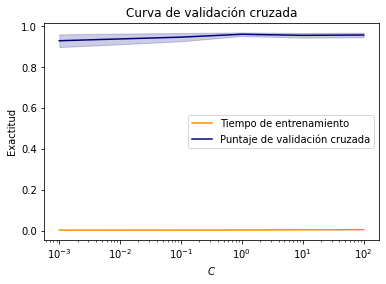

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       212
           1       0.96      0.98      0.97       357

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



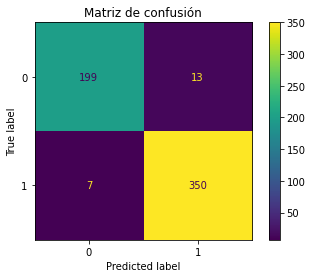

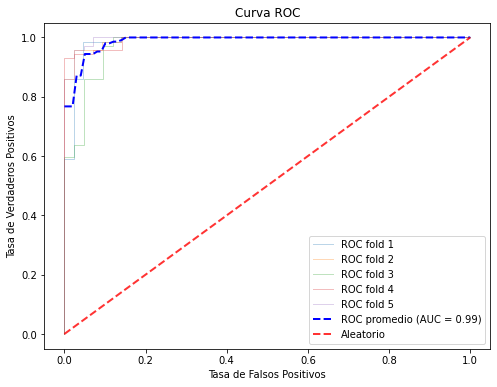

In [21]:
# Separar las características (X) y las etiquetas (y)
X = df_new.drop('target', axis=1)
y = df_new['target']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los parámetros de regularización a probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el modelo de regresión logística
model = LogisticRegression(penalty='l2', solver='liblinear')

# Realizar la búsqueda de hiperparámetros utilizando cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Mejores parámetros encontrados:", best_params)
print("Exactitud promedio en validación cruzada con mejores parámetros:", best_score)

# Graficar los errores de entrenamiento y de validación cruzada para diferentes valores de C
train_times_mean = grid_search.cv_results_['mean_fit_time']
test_scores_mean = grid_search.cv_results_['mean_test_score']
test_scores_std = grid_search.cv_results_['std_test_score']
plt.figure()
plt.title("Curva de validación cruzada")
plt.xlabel("$C$")
plt.ylabel("Exactitud")
plt.semilogx(param_grid['C'], train_times_mean, label="Tiempo de entrenamiento", color="darkorange")
plt.semilogx(param_grid['C'], test_scores_mean, label="Puntaje de validación cruzada", color="navy")
plt.fill_between(param_grid['C'], test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

# Entrenar el modelo con los mejores parámetros encontrados (utilizando todos los datos)
best_model = LogisticRegression(penalty='l2', solver='liblinear', **best_params)
best_model.fit(X_scaled, y)

# Hacer predicciones en todo el conjunto de datos
y_pred = best_model.predict(X_scaled)

# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y, y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

# Graficar la curva ROC para cada fold de cross-validation
plt.figure(figsize=(8, 6))
mean_fpr = np.linspace(0, 1, 100)
tprs = []
for i, (train, test) in enumerate(cv.split(X_scaled, y)):
    probas_ = best_model.fit(X_scaled[train], y[train]).predict_proba(X_scaled[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d' % (i + 1))

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--', label='ROC promedio (AUC = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Aleatorio', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

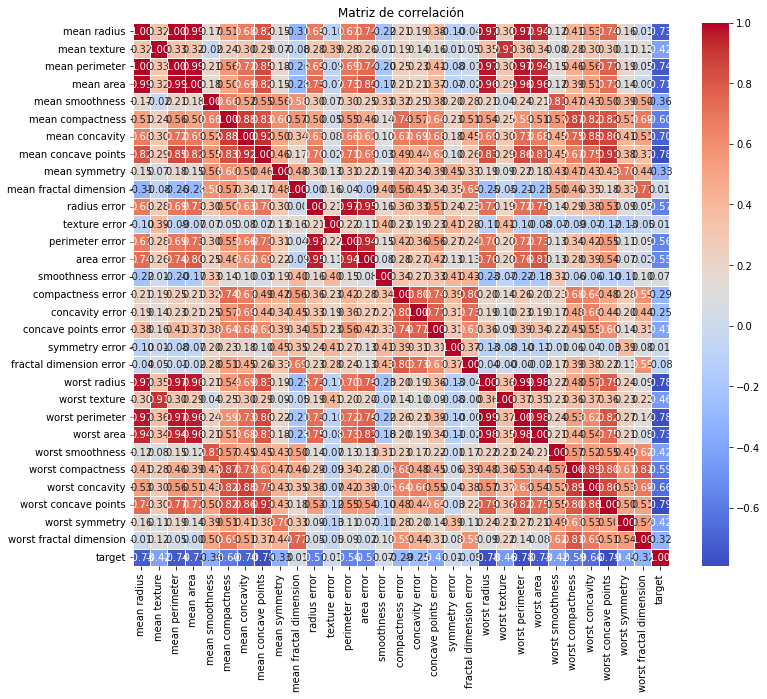

In [14]:
import seaborn as sns
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()